<a href="https://colab.research.google.com/github/Nourankh20/Data-Visualization/blob/nouran/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
import pandas as pd
import numpy as np
def get_path(dataset_name,env_name='colab'):
    """
    This function is used to return the path of the dataset you want to use. 
    
    @params:
    dataset_name: the name of the dataset. 
    env_name: it has two values either local, or colab the default is colab
    """
    prefix = 'https://raw.githubusercontent.com/Nourankh20/Data-Visualization/main/datasets/'
    if env_name == 'colab':
        return prefix+dataset_name
    else:
        return f'../datasets/{dataset_name}'


In [431]:
athlete_events_df =  pd.read_csv(get_path('athlete_events.csv'))

In [432]:
athlete_events_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [433]:
noc_regions = pd.read_csv(get_path('noc_regions.csv'))

In [434]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Merging the 2 datasets into one dataset called df

In [435]:
df = pd.merge(athlete_events_df,noc_regions,left_on='NOC',right_on='NOC')

In [436]:
df.head()

df = df.drop_duplicates()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [437]:
null_values_percentages = df.isna().sum()/len(df) *100
null_values_percentages

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453460
Height    21.800269
Weight    22.806646
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.239177
region     0.007796
notes     98.130907
dtype: float64

# Dealing with outliers in Height


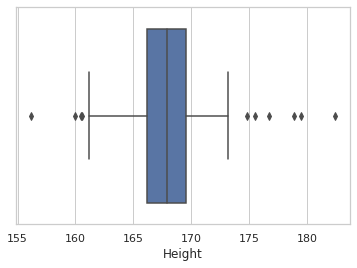

In [438]:
import seaborn as sns

Females= df[df['Sex']=='F']
Males=df[df['Sex']=='M']


sports_height_females = Females.groupby(Females['Sport'])['Height'].mean()
sports_height_males = Males.groupby(Males['Sport'])['Height'].mean()


dropped_null_values_height_females = sports_height_females.dropna(how='all')
dropped_null_values_height_females.values

dropped_null_values_height_males = sports_height_males.dropna(how='all')
dropped_null_values_height_males


ay = sns.boxplot(x=dropped_null_values_height_females)


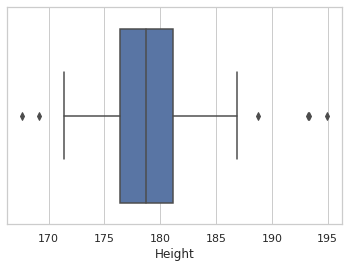

In [439]:
ay = sns.boxplot(x=dropped_null_values_height_males)


In [440]:
#Removed outliers in female height

Q1 = np.percentile(dropped_null_values_height_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1


Females = Females[~(Females['Height'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Height'] <= (Q1-1.5*IQR))]




#Removed outliers in male height

Q1 = np.percentile(dropped_null_values_height_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_height_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Height'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Height'] <= (Q1-1.5*IQR))]




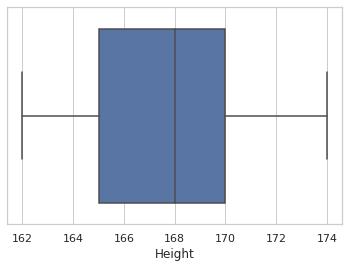

In [441]:
ax = sns.boxplot(x=Females['Height'])


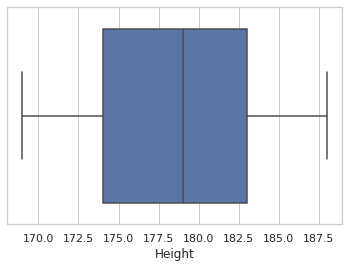

In [442]:
ax = sns.boxplot(x=Males['Height'])


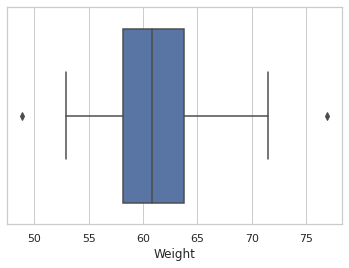

In [443]:

sports_weight_females = Females.groupby(Females['Sport'])['Weight'].mean()
sports_weight_males = Males.groupby(Males['Sport'])['Weight'].mean()


dropped_null_values_weight_females = sports_weight_females.dropna(how='all')
dropped_null_values_weight_females.values

dropped_null_values_weight_males = sports_weight_males.dropna(how='all')
dropped_null_values_weight_males


ay = sns.boxplot(x=dropped_null_values_weight_females)




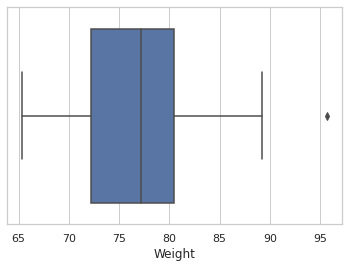

In [444]:
ay = sns.boxplot(x=dropped_null_values_weight_males)



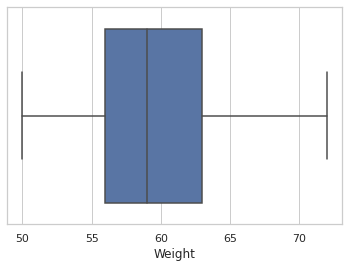

In [445]:

#Removed outliers in female weight

Q1 = np.percentile(dropped_null_values_weight_females.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_females.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Females = Females[~(Females['Weight'] >= (Q3+1.5*IQR))]
Females = Females[~(Females['Weight'] <= (Q1-1.5*IQR))]


#Removed outliers in male weight

Q1 = np.percentile(dropped_null_values_weight_males.values, 25,interpolation = 'midpoint')
Q3 = np.percentile(dropped_null_values_weight_males.values, 75,interpolation = 'midpoint')
IQR = Q3 - Q1

Males = Males[~(Males['Weight'] >= (Q3+1.5*IQR))]
Males = Males[~(Males['Weight'] <= (Q1-1.5*IQR))]

ay = sns.boxplot(x=Females['Weight'])



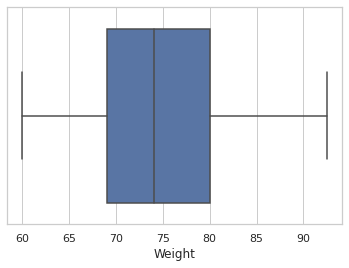

In [446]:
ay = sns.boxplot(x=Males['Weight'])


In [448]:
# #to get the mean of data for the nan data we separated the data by region and sex of athlete

# Females= df[df['Sex']=='F']
# Males=df[df['Sex']=='M']

# # Females = Females.groupby(Females['Sport'])

# Females.describe()
Males.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
216536,39920,Abdul Ghafoor,M,26.0,NaN,NaN,Afghanistan,AFG,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,NaN,Afghanistan,NaN
216537,39922,Abdul Ghafar Ghafoori,M,22.0,172.0,70.0,Afghanistan,AFG,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Afghanistan,NaN
216548,59161,Mohammad Mohammad Khan,M,25.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's 100 metres,NaN,Afghanistan,NaN
216549,59161,Mohammad Mohammad Khan,M,25.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Long Jump,NaN,Afghanistan,NaN
216578,98340,Abdul Rahim,M,23.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Shot Put,NaN,Afghanistan,NaN


In [428]:
#Characteristics --> weight height  sport age region

#mean of each sport (weight , height)
Males['Weight']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
216536,39920,Abdul Ghafoor,M,26.0,NaN,NaN,Afghanistan,AFG,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,NaN,Afghanistan,NaN
216537,39922,Abdul Ghafar Ghafoori,M,22.0,172.0,70.0,Afghanistan,AFG,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Afghanistan,NaN
216548,59161,Mohammad Mohammad Khan,M,25.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's 100 metres,NaN,Afghanistan,NaN
216549,59161,Mohammad Mohammad Khan,M,25.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Long Jump,NaN,Afghanistan,NaN
216578,98340,Abdul Rahim,M,23.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Shot Put,NaN,Afghanistan,NaN


In [427]:
Males.isna().sum()

ID             0
Name           0
Sex            0
Age         8562
Height     51324
Weight     52897
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     126275
region        10
notes     143801
dtype: int64